## The Idea Behind the Metric
    More fast food restaurants in a given neighborhood indicates hotspots for fast food eaters. The more fast food consumed in a region, the more likely the citizens of that neighborhood will be in poorer health.

## How it is measured?
    FastFoodEstablishmentData.csv lists every location of fast food in Allegheny County. First, we will look at the lattitude and logitude of a given establishment. Using "fpsnippets" we will assign the lattitude and longitude to a neighborhood location. We will then create a dictionary of neighborhoods as the key, incrementing everytime an establishment is found to be located in that neighborhood.

<img src="https://s7d1.scene7.com/is/image/mcdonalds/crown_point_mcdonalds-RR-EDIT_003:1-column-desktop?resmode=sharp2"
     alt="mcdonalds"
     style="float: left; margin-right: 10px;" />

In [3]:
import fpsnippets as fp
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
raw_establishments = pd.read_csv("FastFoodEstablishmentData.csv")

neighborhoods = dict()
i = 0

while i < len(raw_establishments):
    
    neighborhood_name = fp.geo_to_neighborhood(raw_establishments.at[i, 'Lat'], raw_establishments.at[i, 'Lon'])
    
    if neighborhood_name in neighborhoods:
        neighborhoods[neighborhood_name] = neighborhoods[neighborhood_name] + 1
        
    else:
        neighborhoods[neighborhood_name] = 1
        
    i+=1
    
print(neighborhoods)

{None: 606, 'Central Business District': 62, 'Carrick': 9, 'Westwood': 3, 'Banksville': 3, 'Central Oakland': 17, 'South Side Flats': 19, 'Bloomfield': 14, 'Oakwood': 2, 'Shadyside': 13, 'Squirrel Hill South': 15, 'Bluff': 3, 'East Liberty': 5, 'Lincoln-Lemington-Belmar': 10, 'Central Northside': 4, 'Allegheny Center': 2, 'Strip District': 3, 'South Shore': 4, 'North Oakland': 13, 'Friendship': 1, 'Central Lawrenceville': 3, 'Squirrel Hill North': 3, 'Larimer': 3, 'Mount Washington': 2, 'Brookline': 3, 'Homewood West': 1, 'Chateau': 3, 'Beechview': 2, 'Allegheny West': 3, 'Greenfield': 2, 'East Allegheny': 1, 'Point Breeze': 1, 'Crawford-Roberts': 1, 'Upper Lawrenceville': 1, 'Elliott': 1}


The dictionary that has been created assigns each data point to a neighborhood, but majorly 'None'. This is because the majority of fast food establishments in Allegheny County fall outside of Pittsburgh, and they will be ignored in our study.

In [11]:
establishments = pd.DataFrame(
    {
        'Neighborhood' : neighborhoods.keys(),
        'Fast Food Establishments' : neighborhoods.values()
    }
)

sorted_establishments = establishments.sort_values(by = 'Fast Food Establishments', ascending = False)
display(sorted_establishments)

,Neighborhood,Fast Food Establishments
0,None,606
1,Central Business District,62
6,South Side Flats,19
5,Central Oakland,17
10,Squirrel Hill South,15
7,Bloomfield,14
18,North Oakland,13
9,Shadyside,13
13,Lincoln-Lemington-Belmar,10
2,Carrick,9


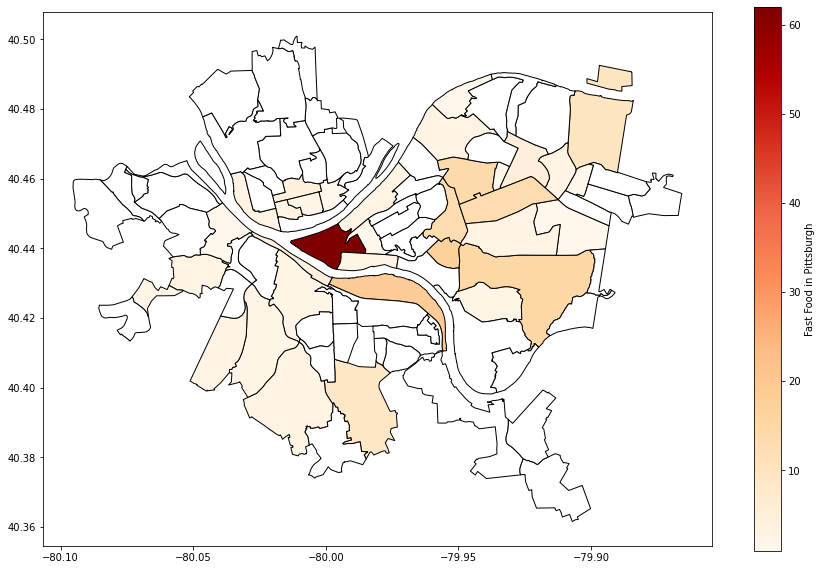

In [12]:
neighborhoods_list = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
establishments_map = neighborhoods_list.merge(establishments, how='left', left_on='hood', right_on='Neighborhood')
establishments_map.plot(column='Fast Food Establishments', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="black",        # outline the districts in black
               legend = True,
               legend_kwds={'label': "Fast Food in Pittsburgh"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "white"} # set disctricts with no data to gray
               )

# Conclusion
After analysis of the neighborhood heat map, the Central Business District stands out as a significant outlier in terms of fast food establishment count. In second place comes the South Side Flats, which makes sense since it is a neighborhood known for its food. These are followed by Central Oakland and Squirrel Hill South, which also make sense since it is where the college students of the city are located.